In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Korea_Apt_Data/0.csv')

In [3]:
df.head(5)

,Unnamed: 0,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,852646,62,84,67,82,70,88,76,84,30,29,31,46,83,84,78,81,61,58,55,58,71,73,71,73,49,78,60,73,57,84,67,64,17,18,21,43,46,56,55,...,25,25,22.0,17,18,31,31,87,83,87,92,55,55,56,57,94,93,82,86,66,66,62,63,35,35,35,33.0,67,64,38,9.0,65,59,55,11.0,25,40,30,7.0,-1499.507619
1,198665,49,25,13,6,80,67,60,50,2,3,3,1,41,37,40,36,89,90,92,92,10,9,9,9,73,55,49,38,81,67,55,39,26,21,18,6,37,29,37,...,12,12,13.0,7,6,9,9,77,80,77,85,85,86,86,86,94,95,92,94,91,92,92,92,78,79,78,79.0,8,10,9,6.0,49,52,52,32.0,32,20,17,8.0,465.785299
2,544294,85,75,55,35,83,72,63,59,68,64,40,18,70,67,64,59,82,84,81,81,31,29,31,35,94,90,76,57,85,74,64,58,96,95,75,38,83,82,81,...,10,11,13.0,4,3,9,9,15,13,22,19,79,81,77,75,66,67,61,74,90,91,88,88,89,89,84,85.0,53,58,59,23.0,98,97,78,19.0,0,0,0,0.0,-1338.213068
3,538274,80,66,57,17,86,76,72,25,36,34,32,49,61,58,53,62,78,79,77,80,31,29,30,37,81,67,55,20,90,83,74,21,13,11,18,48,85,85,74,...,75,74,75.0,29,29,21,21,56,57,57,48,51,51,53,48,71,72,69,55,58,57,61,57,49,49,51,52.0,24,29,25,1.0,0,0,0,0.0,77,75,64,2.0,-825.944564
4,107715,48,25,47,41,62,42,63,52,19,19,21,29,51,48,50,50,76,78,78,71,27,25,26,33,56,30,65,54,62,37,67,50,26,22,30,50,42,35,40,...,16,19,22.0,85,91,92,92,76,80,78,57,81,82,81,73,46,44,50,35,71,71,73,65,74,74,73,69.0,20,25,19,10.0,38,38,37,12.0,41,30,27,3.0,1290.212365


In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.head(5)

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,62,84,67,82,70,88,76,84,30,29,31,46,83,84,78,81,61,58,55,58,71,73,71,73,49,78,60,73,57,84,67,64,17,18,21,43,46,56,55,69,...,25,25,22.0,17,18,31,31,87,83,87,92,55,55,56,57,94,93,82,86,66,66,62,63,35,35,35,33.0,67,64,38,9.0,65,59,55,11.0,25,40,30,7.0,-1499.507619
1,49,25,13,6,80,67,60,50,2,3,3,1,41,37,40,36,89,90,92,92,10,9,9,9,73,55,49,38,81,67,55,39,26,21,18,6,37,29,37,36,...,12,12,13.0,7,6,9,9,77,80,77,85,85,86,86,86,94,95,92,94,91,92,92,92,78,79,78,79.0,8,10,9,6.0,49,52,52,32.0,32,20,17,8.0,465.785299
2,85,75,55,35,83,72,63,59,68,64,40,18,70,67,64,59,82,84,81,81,31,29,31,35,94,90,76,57,85,74,64,58,96,95,75,38,83,82,81,78,...,10,11,13.0,4,3,9,9,15,13,22,19,79,81,77,75,66,67,61,74,90,91,88,88,89,89,84,85.0,53,58,59,23.0,98,97,78,19.0,0,0,0,0.0,-1338.213068
3,80,66,57,17,86,76,72,25,36,34,32,49,61,58,53,62,78,79,77,80,31,29,30,37,81,67,55,20,90,83,74,21,13,11,18,48,85,85,74,78,...,75,74,75.0,29,29,21,21,56,57,57,48,51,51,53,48,71,72,69,55,58,57,61,57,49,49,51,52.0,24,29,25,1.0,0,0,0,0.0,77,75,64,2.0,-825.944564
4,48,25,47,41,62,42,63,52,19,19,21,29,51,48,50,50,76,78,78,71,27,25,26,33,56,30,65,54,62,37,67,50,26,22,30,50,42,35,40,31,...,16,19,22.0,85,91,92,92,76,80,78,57,81,82,81,73,46,44,50,35,71,71,73,65,74,74,73,69.0,20,25,19,10.0,38,38,37,12.0,41,30,27,3.0,1290.212365


In [6]:
df

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,62,84,67,82,70,88,76,84,30,29,31,46,83,84,78,81,61,58,55,58,71,73,71,73,49,78,60,73,57,84,67,64,17,18,21,43,46,56,55,69,...,25,25,22.0,17,18,31,31,87,83,87,92,55,55,56,57,94,93,82,86,66,66,62,63,35,35,35,33.0,67,64,38,9.0,65,59,55,11.0,25,40,30,7.0,-1499.507619
1,49,25,13,6,80,67,60,50,2,3,3,1,41,37,40,36,89,90,92,92,10,9,9,9,73,55,49,38,81,67,55,39,26,21,18,6,37,29,37,36,...,12,12,13.0,7,6,9,9,77,80,77,85,85,86,86,86,94,95,92,94,91,92,92,92,78,79,78,79.0,8,10,9,6.0,49,52,52,32.0,32,20,17,8.0,465.785299
2,85,75,55,35,83,72,63,59,68,64,40,18,70,67,64,59,82,84,81,81,31,29,31,35,94,90,76,57,85,74,64,58,96,95,75,38,83,82,81,78,...,10,11,13.0,4,3,9,9,15,13,22,19,79,81,77,75,66,67,61,74,90,91,88,88,89,89,84,85.0,53,58,59,23.0,98,97,78,19.0,0,0,0,0.0,-1338.213068
3,80,66,57,17,86,76,72,25,36,34,32,49,61,58,53,62,78,79,77,80,31,29,30,37,81,67,55,20,90,83,74,21,13,11,18,48,85,85,74,78,...,75,74,75.0,29,29,21,21,56,57,57,48,51,51,53,48,71,72,69,55,58,57,61,57,49,49,51,52.0,24,29,25,1.0,0,0,0,0.0,77,75,64,2.0,-825.944564
4,48,25,47,41,62,42,63,52,19,19,21,29,51,48,50,50,76,78,78,71,27,25,26,33,56,30,65,54,62,37,67,50,26,22,30,50,42,35,40,31,...,16,19,22.0,85,91,92,92,76,80,78,57,81,82,81,73,46,44,50,35,71,71,73,65,74,74,73,69.0,20,25,19,10.0,38,38,37,12.0,41,30,27,3.0,1290.212365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [7]:
df.info

<bound method DataFrame.info of         q_all_sell_unit_price_danji  ...  sell_unit_price_sidanji_gap
0                                62  ...                 -1499.507619
1                                49  ...                   465.785299
2                                85  ...                 -1338.213068
3                                80  ...                  -825.944564
4                                48  ...                  1290.212365
...                             ...  ...                          ...
114633                           46  ...                   631.901115
114634                           38  ...                   469.345446
114635                           81  ...                  -975.984229
114636                           47  ...                   131.273677
114637                           78  ...                 -2124.829835

[114638 rows x 253 columns]>

In [8]:
df.describe()

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
count,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.00000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.00000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,...,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.00000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000,114638.000000
mean,44.534387,43.546887,42.225388,41.205944,45.220974,44.441267,43.325956,42.07050,47.839486,47.911609,47.872765,47.731843,44.571809,44.617954,44.584457,44.54133,50.307272,49.524721,49.787636,49.694674,45.220355,45.214100,45.202533,45.158508,43.264834,41.298531,38.047236,35.340890,43.894407,41.996554,38.812968,35.582163,45.425827,45.294056,44.851463,43.039812,41.352466,41.377920,41.291465,40.899274,...,48.143870,48.0

In [ ]:
# sns.heatmap(df.isnull())

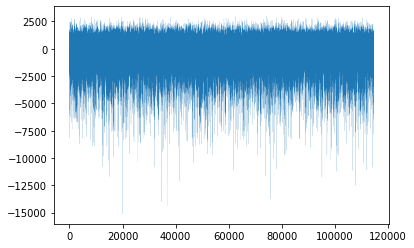

In [9]:
df['sell_unit_price_sidanji_gap'].plot(linewidth = 0.1)

In [10]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1:].values

In [11]:
X.shape

(114638, 252)

In [12]:
Y.shape

(114638, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(Y)
X = scaler_X.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [15]:
X_train.shape

(91710, 252)

In [16]:
X_test.shape

(22928, 252)

In [17]:
X_train

array([[0.08080808, 0.13131313, 0.46464646, ..., 0.43529412, 0.43181818,
        0.01149425],
       [0.78787879, 0.93939394, 0.88888889, ..., 0.62352941, 0.32954545,
        0.04597701],
       [0.76767677, 0.60606061, 0.74747475, ..., 0.45882353, 0.39772727,
        0.35632184],
       ...,
       [0.74747475, 0.57575758, 0.68686869, ..., 0.        , 0.        ,
        0.        ],
       [0.31313131, 0.51515152, 0.33333333, ..., 0.94117647, 0.55681818,
        0.08045977],
       [0.54545455, 0.32323232, 0.31313131, ..., 0.85882353, 0.82954545,
        0.59770115]])

In [18]:
Y_train

array([[0.88195508],
       [0.76542146],
       [0.81721555],
       ...,
       [0.80720951],
       [0.84592819],
       [0.86205796]])

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (252, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               126500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 628,001
Trainable params: 628,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [22]:
epochs_hist = model.fit( X_train, Y_train, epochs = 20, batch_size = 50, validation_split= 0.2 )

Epoch 1/20
1468/1468 [==============================] - 9s 5ms/step - loss: 0.0033 - val_loss: 7.6682e-04
Epoch 2/20
1468/1468 [==============================] - 6s 4ms/step - loss: 7.0969e-04 - val_loss: 5.3698e-04
Epoch 3/20
1468/1468 [==============================] - 7s 5ms/step - loss: 5.7660e-04 - val_loss: 5.9812e-04
Epoch 4/20
1468/1468 [==============================] - 6s 4ms/step - loss: 4.9996e-04 - val_loss: 6.1266e-04
Epoch 5/20
1468/1468 [==============================] - 6s 4ms/step - loss: 4.7423e-04 - val_loss: 4.3766e-04
Epoch 6/20
1468/1468 [==============================] - 7s 5ms/step - loss: 4.6361e-04 - val_loss: 4.7914e-04
Epoch 7/20
1468/1468 [==============================] - 7s 5ms/step - loss: 4.4159e-04 - val_loss: 4.3089e-04
Epoch 8/20
1468/1468 [==============================] - 7s 5ms/step - loss: 4.2726e-04 - val_loss: 4.1616e-04
Epoch 9/20
1468/1468 [==============================] - 6s 4ms/step - loss: 4.0815e-04 - val_loss: 4.0563e-04
Epoch 10/20
14

In [23]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

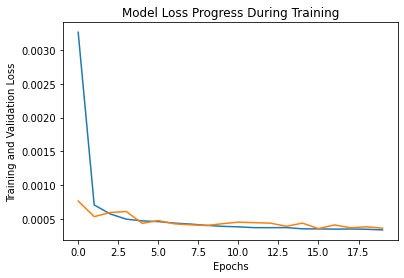

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')

Text(0, 0.5, 'True Values')

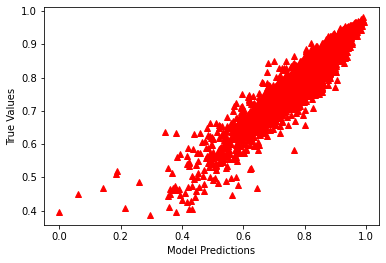

In [25]:
y_predict = model.predict(X_test)
plt.plot(Y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
 y_predict_orig = scaler_Y.inverse_transform(y_predict)

need two scaler

In [ ]:
 y_test_orig = scaler_Y.inverse_transform(Y_test)

Text(0, 0.5, 'True Values')

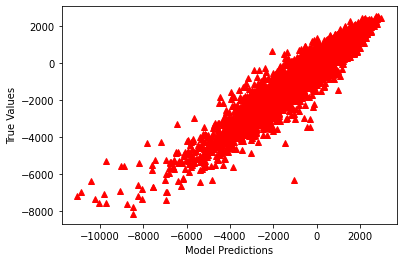

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')